In [3]:
# file-handling
import os 

# user status updates
import time
from time import gmtime, strftime
from tqdm import tqdm
from IPython.display import display, Latex
from datetime import datetime

# the holy trinity of python data science
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# scipy
import scipy
from scipy import sparse, linalg, fft
from scipy.linalg import expm, sinm, cosm
import scipy.integrate as integrate
from scipy.integrate import quad

# parallelization, memory management
from joblib import Parallel, delayed
from numba import jit, njit, prange
import copy

# itertools
import itertools

# Locals 
from N2_SUSY_SYK import HamiltonianGenerator

############ Macros ###############
np.random.seed(0)

# Physical constants
J_range = [1e1, 1e2, 1e3, 1e4]
N_range = [8, 10, 12]
Q_COUPLING = 3 # order of coupling, don't want to use the letter 'Q' because that denotes the supercharge

# Computer stuff
N_SAMPLES = 100 # number of samples to generate
N_JOBS = 20 # number of jobs to run in parallel

# Directories
N2_SUSY_DIR = os.path.join("Excel", "N2_SUSY_SYK")

Manually note first nonzero eigenvalues for each (N, J)

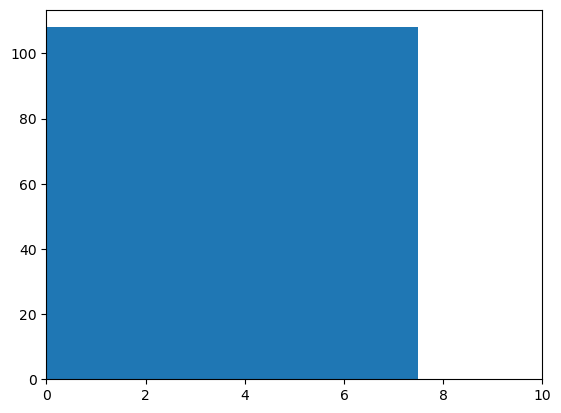

In [4]:
N = 8
J = 1e4
H_generator = HamiltonianGenerator(N, J, n_jobs=N_JOBS, parent_dir=N2_SUSY_DIR)
H = H_generator.make_H(0)
iv = np.linalg.eigvalsh(H.toarray())
plt.figure()
plt.hist(iv, bins=4000)
plt.xlim(0, 10)
plt.show()
plt.close()

In [6]:
# (N, J)
first_nonzero_dict = {(8, 1e1): 0.04,
                      (8, 1e2): 0.08,
                      (8, 1e3): 0.8, 
                      (8, 1e4): 8,
                      (10, 1e1): 0.02,
                      (10, 1e2): 0.1,
                      (10, 1e3): 1,
                      (10, 1e4): 10,
                      (12, 1e1): 0.02,
                      (12, 1e2): 0.2,
                      (12, 1e3): 1.5,
                      (12, 1e4): 10
}

def process_i(i, H_gen, first_nonzero):
    H_i = H_gen.make_H(i)
    ivals_i = np.linalg.eigvalsh(H_i.toarray())
    proportion_0 = sum(ivals_i<first_nonzero)/len(ivals_i)
    return proportion_0

proportions = {}
tic = time.time()
for N in N_range:
    for J in J_range:
        print(f"\n(N, J) = ({N}, {J})")
        H_generator = HamiltonianGenerator(N, J, n_jobs=N_JOBS, parent_dir=N2_SUSY_DIR)
        proportions_NJ = Parallel(n_jobs=N_JOBS)(delayed(process_i)(i, H_generator, first_nonzero_dict[(N,J)]) for i in tqdm(range(N_SAMPLES)))
        proportions[(N,J)] = np.mean(np.array(proportions_NJ))
duration = time.time() - tic
print(f"Duration: {duration//60} minutes, {duration%60} seconds")



(N, J) = (8, 10.0)


100%|██████████| 100/100 [00:00<00:00, 159.27it/s]



(N, J) = (8, 100.0)


100%|██████████| 100/100 [00:00<00:00, 161.21it/s]



(N, J) = (8, 1000.0)


100%|██████████| 100/100 [00:00<00:00, 160.77it/s]



(N, J) = (8, 10000.0)


100%|██████████| 100/100 [00:00<00:00, 170.90it/s]



(N, J) = (10, 10.0)


100%|██████████| 100/100 [00:43<00:00,  2.32it/s]



(N, J) = (10, 100.0)


100%|██████████| 100/100 [00:55<00:00,  1.82it/s]



(N, J) = (10, 1000.0)


100%|██████████| 100/100 [00:53<00:00,  1.86it/s]



(N, J) = (10, 10000.0)


100%|██████████| 100/100 [00:53<00:00,  1.87it/s]



(N, J) = (12, 10.0)


100%|██████████| 100/100 [03:33<00:00,  2.13s/it]



(N, J) = (12, 100.0)


100%|██████████| 100/100 [03:57<00:00,  2.38s/it]



(N, J) = (12, 1000.0)


100%|██████████| 100/100 [03:38<00:00,  2.18s/it]



(N, J) = (12, 10000.0)


100%|██████████| 100/100 [03:42<00:00,  2.23s/it]


Duration: 27.0 minutes, 4.993330240249634 seconds


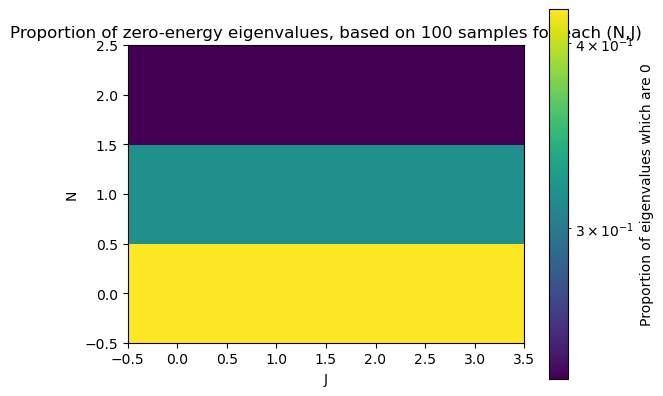

In [8]:
heatmap = np.zeros(shape=(len(N_range), len(J_range)))
for i, N in enumerate(N_range):
    for j, J in enumerate(J_range):
        heatmap[i,j] = proportions[(N,J)]

plt.figure()
plt.imshow(heatmap, norm="log", origin="lower")
plt.colorbar(label="Proportion of eigenvalues which are 0")
plt.xlabel("J")
plt.ylabel("N")
plt.title("Proportion of zero-energy eigenvalues, based on 100 samples for each (N,J)")
plt.savefig(os.path.join(N2_SUSY_DIR, "Simulated Hamiltonians" "proportion_of_zero_energy_eigenvalues.png"))
plt.show()
plt.close()

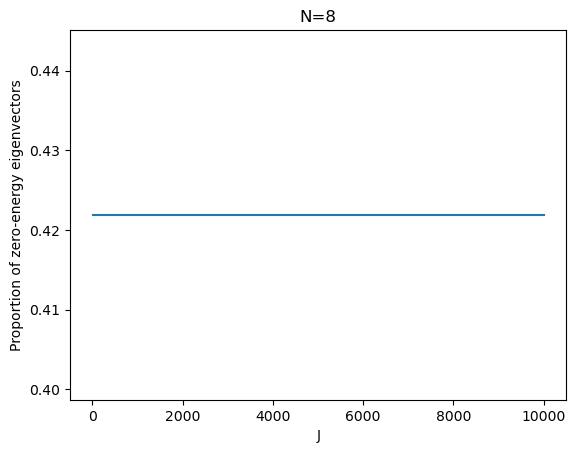

In [11]:
plt.figure()
plt.plot(J_range, heatmap[0,:])
plt.xlabel("J")
plt.ylabel("Proportion of zero-energy eigenvectors")
plt.title(f"N={N_range[0]}")
plt.show()
plt.close()

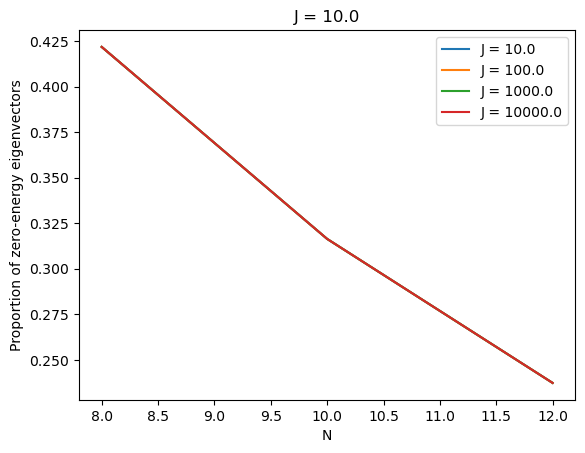

In [14]:
plt.figure()
for i in range(heatmap.shape[1]):
    plt.plot(N_range, heatmap[:,i], label=f"J = {J_range[i]}")
plt.xlabel("N")
plt.ylabel("Proportion of zero-energy eigenvectors")
plt.title(f"J = {J_range[0]}")
plt.legend()
plt.show()
plt.close()

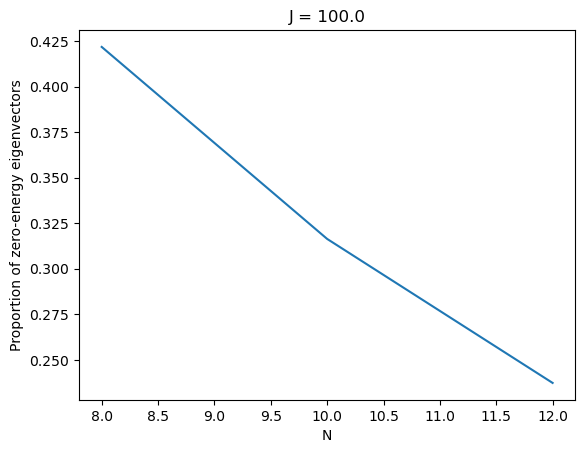

In [13]:
plt.figure()
plt.plot(N_range, heatmap[:,1])
plt.xlabel("N")
plt.ylabel("Proportion of zero-energy eigenvectors")
plt.title(f"J = {J_range[1]}")
plt.show()
plt.close()